In [112]:
# Exploratory analysis of cab data.
## Project XYZ
### Keilor Fallas Prado

In [114]:
## Introduction
# This notebook contains an analysis of cab data with objective to obtaining information about cabs,
# and provide recommendation for a possible investment in this sector

In [116]:
# We load libraries to access data, we use Pandas for data manipulation, NumPy for numerical operation,
# matplotlib and seaborn for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# We load the data for visualization.
cab= pd.read_csv("C:/Users/kfall/Desktop/Internship/WEEK 2/Cab_Data.csv")
customer= pd.read_csv("C:/Users/kfall/Desktop/Internship/WEEK 2/Customer_ID.csv")
transaction= pd.read_csv("C:/Users/kfall/Desktop/Internship/WEEK 2/Transaction_ID.csv")
city= pd.read_csv("C:/Users/kfall/Desktop/Internship/WEEK 2/City.csv")

In [119]:
# Each data table is print for visualization.
print(cab.head())
print(customer.head())
print(transaction.head())
print(city.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290       

In [120]:
print(cab['Date of Travel']) # The data format is incorrect

0         42377
1         42375
2         42371
3         42376
4         42372
          ...  
359387    43108
359388    43104
359389    43105
359390    43105
359391    43102
Name: Date of Travel, Length: 359392, dtype: int64


In [121]:
cab.info() # Type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [122]:
# We convert the numerical data to date format, ensuring it ranges from 31/01/2016 to 31/12/2018.
cab['Date of Travel'] = pd.to_numeric(cab['Date of Travel'], errors='coerce')

In [123]:
cab['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(cab['Date of Travel'], unit='D')
print(cab['Date of Travel'].head())

0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: Date of Travel, dtype: datetime64[ns]


In [127]:
# We check for null numbers.(There are none)
print(cab.isnull().sum())
print(customer.isnull().sum())
print(transaction.isnull().sum())
print(city.isnull().sum())


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64


In [131]:
# We check if there are duplicate numbers (There are none)
print(cab.duplicated().sum())
print(customer.duplicated().sum())
print(transaction.duplicated().sum())
print(city.duplicated().sum())

0
0
0
0


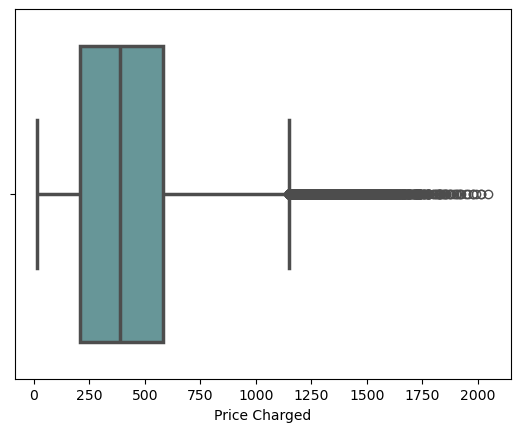

In [132]:
# We create a box plot to analyze outliers, in this box plot, there are outliers, which depend on the kilometers and price charged.
sns.boxplot(x=cab['Price Charged'], color= "cadetblue", linewidth=2.5)
plt.show()


In [134]:
# The correlation is positive because if the price charged goes up, the kilometers traveled also increase.
cab[['Price Charged', 'KM Travelled']].corr()


,Price Charged,KM Travelled
Price Charged,1.000000,0.835753
KM Travelled,0.835753,1.000000


In [135]:
# We confirmed this correlation was correct.
outliers = cab[cab['Price Charged'] > 1250].round()
print(outliers[['KM Travelled', 'Price Charged']])


        KM Travelled  Price Charged
233             34.0         1341.0
234             42.0         1412.0
237             46.0         1541.0
247             39.0         1431.0
504             46.0         1520.0
...              ...            ...
355815          45.0         1295.0
356044          41.0         1259.0
356234          44.0         1250.0
356286          46.0         1278.0
356292          42.0         1269.0

[3127 rows x 2 columns]


In [136]:
# we join the data tables
## We create a table by joining the cab table with the transaction table using transaction ID. 
# Then we join the customer table with the customer ID, and finally, we join the city table using the city.

In [137]:
table_union= pd.merge(cab, transaction, on='Transaction ID', how='inner')
table_union= pd.merge(table_union, customer, on= 'Customer ID', how='inner')
table_union= pd.merge(table_union, city, on='City', how='inner')
print(table_union.head())

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95       313.635        29290         Card   Male   28   
1         358.52       334.854        27703         Card   Male   27   
2         125.20        97.632        28712         Cash   Male   53   
3         377.40       351.602        28020         Cash   Male   23   
4         114.62        97.776        27182         Card   Male   33   

   Income (USD/Month) Population     Users  
0               10813   814,885    24,701   
1                9237   814,885    24,701   

In [138]:
# We check the null numbers
print(table_union.isnull().sum())

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64


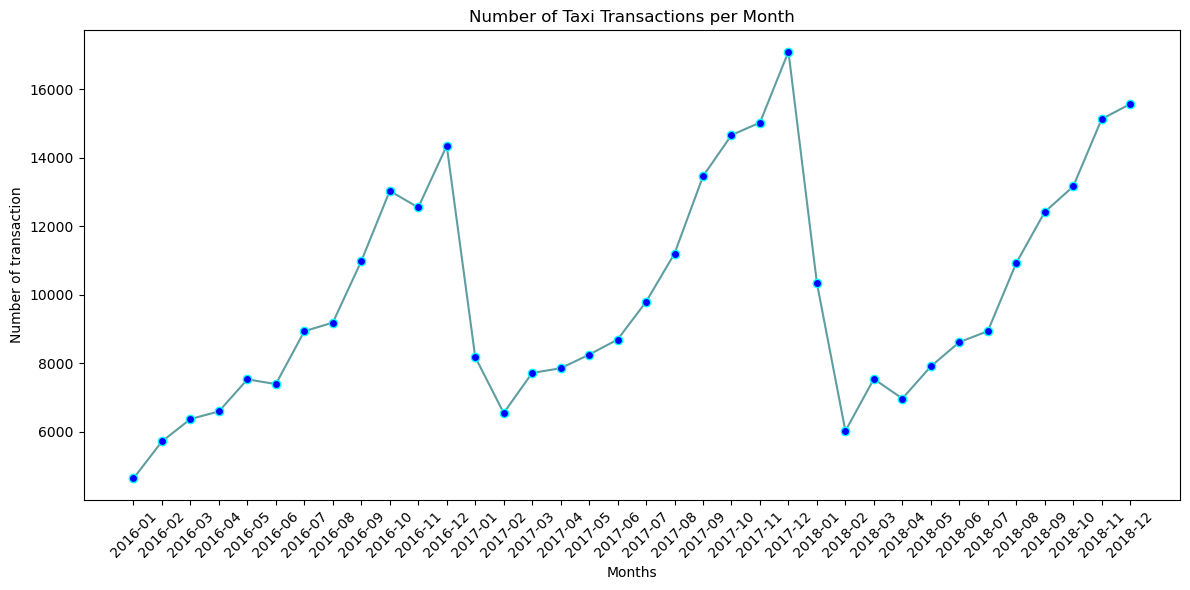

In [140]:
# Is there any seasonality in number of customers using the cab service?
## In this plot, we can see that there are more transactions in December because it is Christmas, so people go out more purchases.
table_union['Month'] = table_union['Date of Travel'].dt.to_period('M')
months= table_union.groupby('Month').size().reset_index(name='Number of Transactions')
# We visualization it
plt.figure(figsize=(12, 6))
plt.plot(months['Month'].astype(str), months['Number of Transactions'], color= 'cadetblue', mec= 'cyan', mfc = 'blue', marker='o')
plt.title('Number of Taxi Transactions per Month')
plt.xlabel('Months')
plt.ylabel('Number of transaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



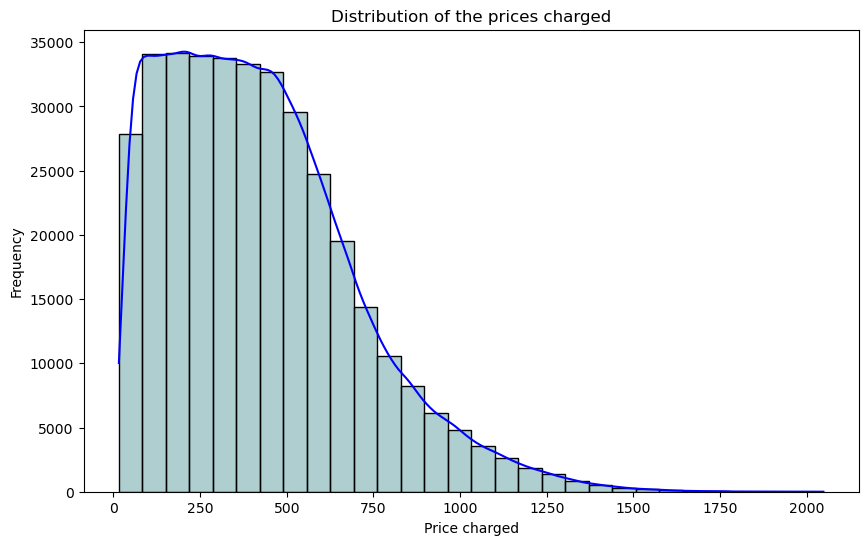

In [141]:
# In what range is the price charged most frequent?
## In this plot, we can see that the range from 100 to 500 is the most frequent.
plt.figure(figsize=(10,6))
sns.histplot(table_union['Price Charged'], bins=30, kde=True, color= 'cadetblue')
kde_line = plt.gca().lines[-1]
kde_line.set_color('blue')
plt.title('Distribution of the prices charged')
plt.xlabel('Price charged')
plt.ylabel('Frequency')
plt.show()

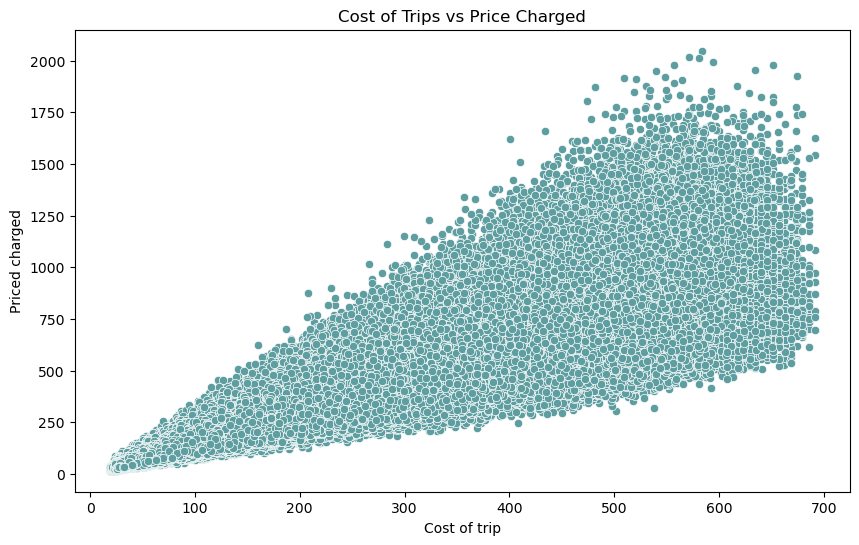

In [142]:
# What is the correlation between price charged and cost of trip?
#In this case, there is a positive correlation because as the cost of the trip goes up, the price charged also increases.
plt.figure(figsize=(10,6))
sns.scatterplot(data=table_union, x='Cost of Trip', y='Price Charged', color= 'cadetblue')
plt.title('Cost of Trips vs Price Charged')
plt.xlabel('Cost of trip')
plt.ylabel('Priced charged')
plt.show()

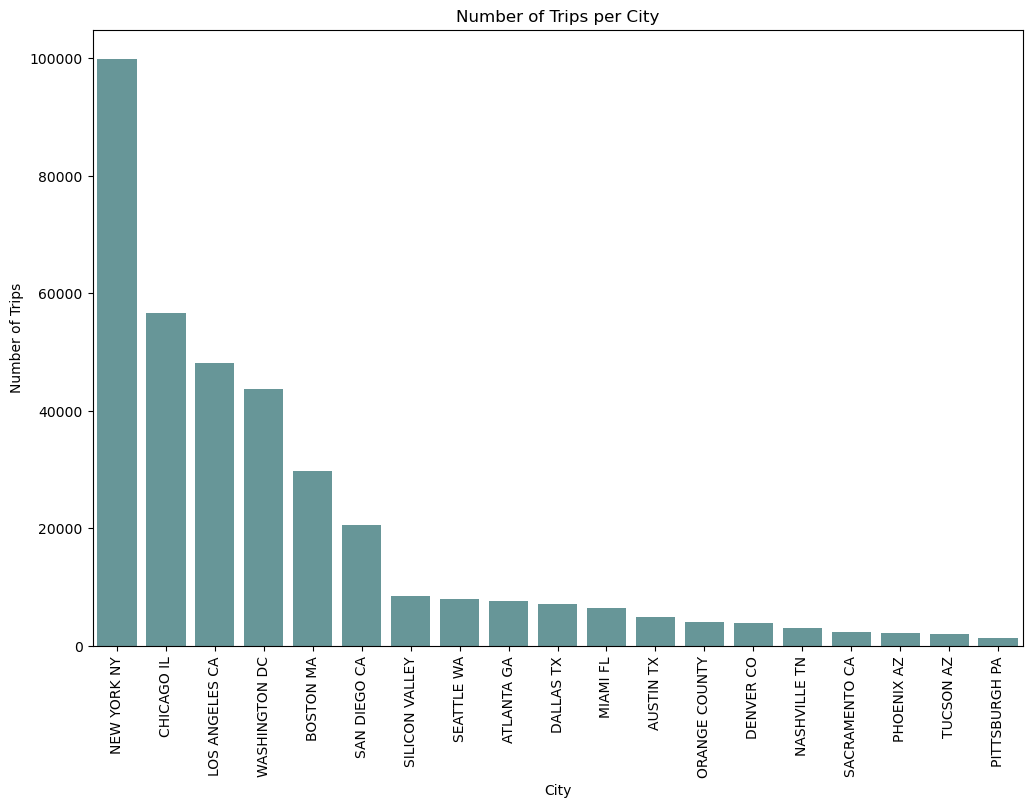

In [143]:
# Which city has the most trips?
# The city with the most trips is New york.
plt.figure(figsize=(12,8))
city_trip_counts= table_union['City'].value_counts()
sns.barplot(x=city_trip_counts.index, y=city_trip_counts.values, color= 'cadetblue')
plt.title('Number of Trips per City')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()



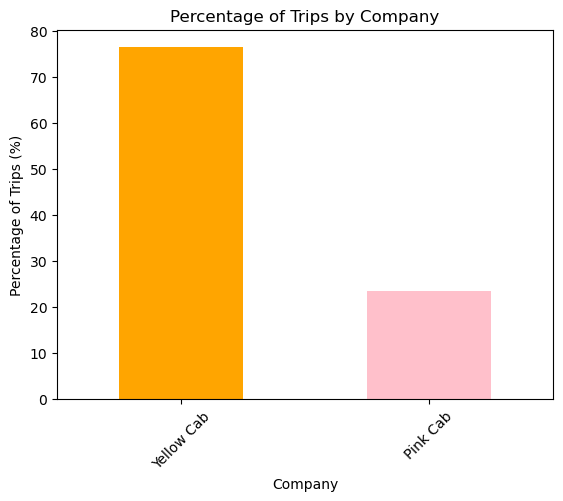

In [144]:
# What company has the biggest number of trip?
## The company is Yellow Cab, which suggests that it has more profits.
company_trip_counts = table_union['Company'].value_counts()
company_trip_percentages = (company_trip_counts / company_trip_counts.sum()) * 100
company_trip_percentages.plot(kind='bar', title='Percentage of Trips by Company', color=['orange', 'pink'])
plt.ylabel('Percentage of Trips (%)')
plt.xticks(rotation=45) 
plt.show()

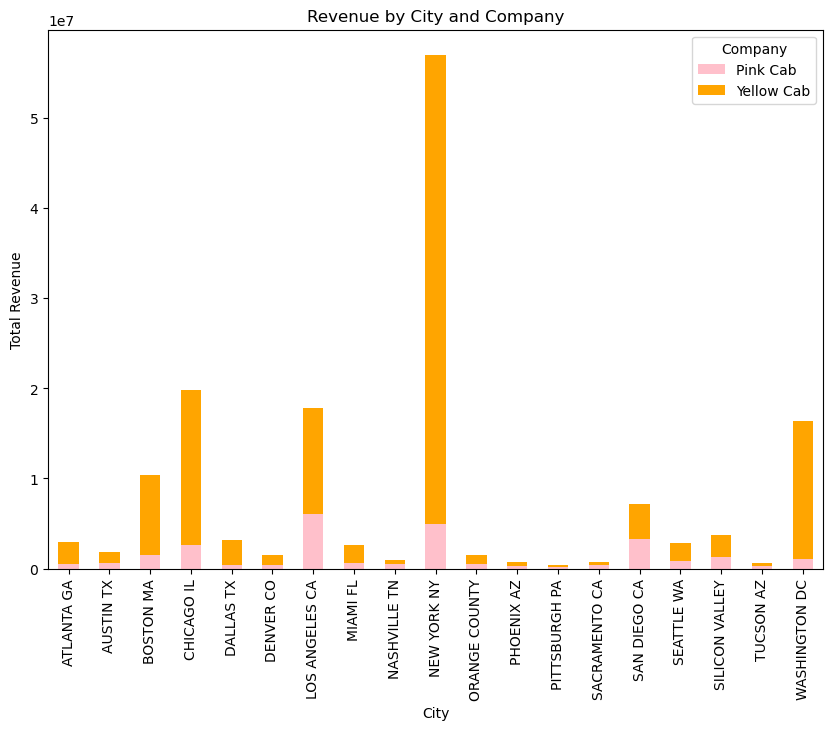

In [145]:
# Which city has the most income?
## The city with the most income is New york with the company Yellow cab. 
city_company = table_union.groupby(['City', 'Company'])['Price Charged'].sum().unstack()
city_company.plot(kind='bar', stacked=True, title='Revenue by City and Company', color=['pink', 'orange'], figsize=(10,7))
plt.ylabel('Total Revenue')
plt.show()

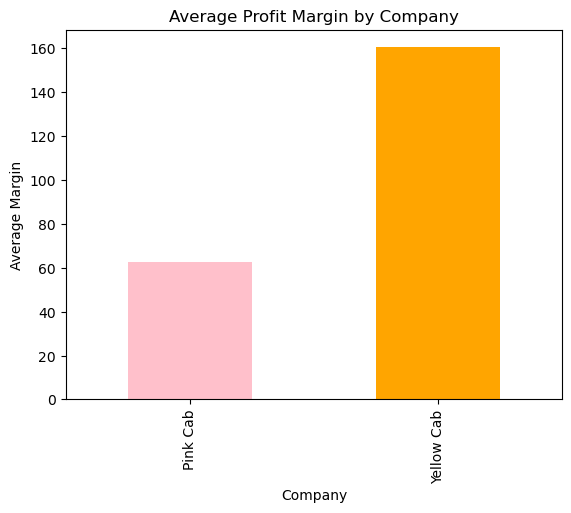

In [146]:
# Which company has the most profit margin?
## The company the most profit margin is Yellow cab.
table_union['Profit_Margin'] = table_union['Price Charged'] - table_union['Cost of Trip']
profit_margin_by_company = table_union.groupby('Company')['Profit_Margin'].mean()

profit_margin_by_company.plot(kind='bar', title='Average Profit Margin by Company', color=['pink', 'orange'])
plt.ylabel('Average Margin')
plt.show()


In [148]:
# Which company has maximum cab users at a particular time period?
## The company with the most users is Yellow cab with 271207 users.
start_date = '2016-01-31' 
end_date = '2018-12-31'   
filtered_data = table_union[(table_union['Date of Travel'] >= start_date) & (table_union['Date of Travel'] <= end_date)]
users_by_company = filtered_data.groupby('Company')['Transaction ID'].count()
max_users_company = users_by_company.idxmax()
max_users_count = users_by_company.max()
print(f"The company with the most users is: {max_users_company} con {max_users_count} usuarios.")

The company with the most users is: Yellow Cab con 271207 usuarios.


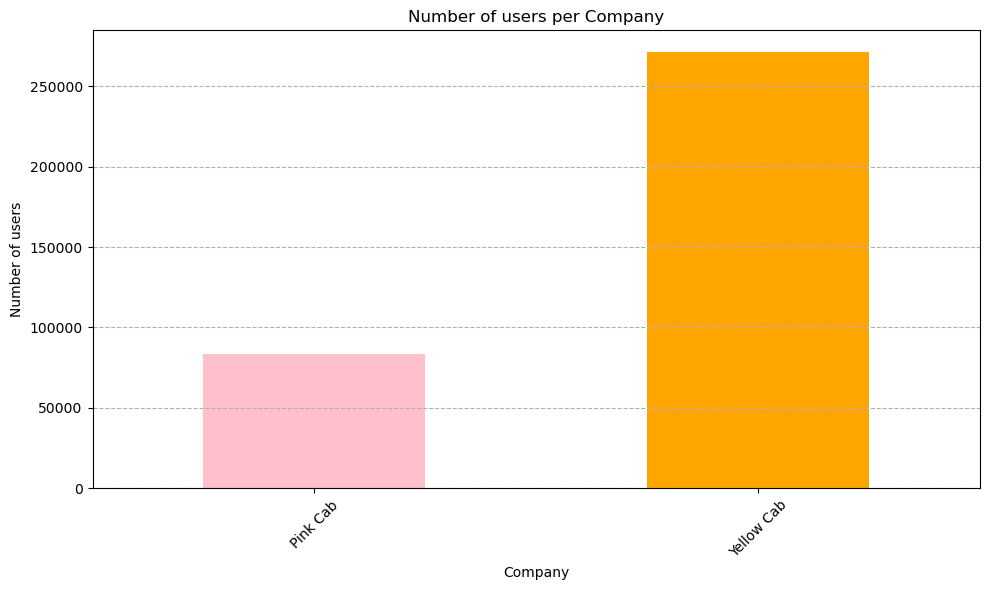

In [149]:
plt.figure(figsize=(10, 6))
users_by_company.plot(kind='bar', color=('pink', 'orange'))
plt.title('Number of users per Company')
plt.xlabel('Company')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


In [150]:
# Does margin proportionally increase with increase in number of customers?
## It depends, because some customers don't have trips and therefore don't generate a margin. However the other clients do generate margin. 

Correlation between number of trips (approx. customers) and total margin: 
                 Trips  Total_Margin
Trips         1.000000      0.846486
Total_Margin  0.846486      1.000000


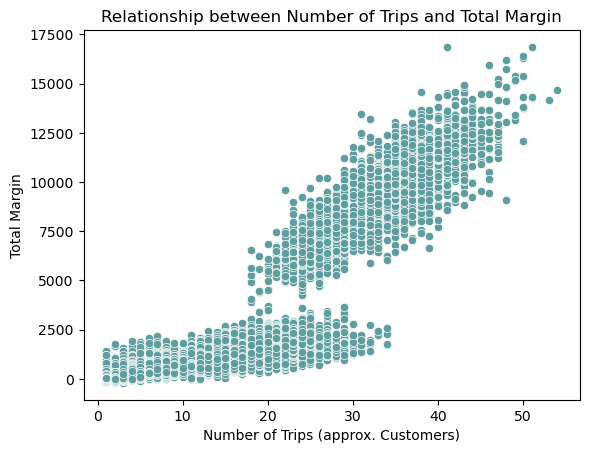

In [154]:
table_union['Margen'] = table_union['Price Charged'] - table_union['Cost of Trip']
margin_per_customer = table_union.groupby('Customer ID').agg(
    Total_Margin=('Margen', 'sum'),
    Trips=('Transaction ID', 'count')).reset_index()
Number_clients = table_union['Customer ID'].nunique()
correlacion = margin_per_customer[['Trips', 'Total_Margin']].corr()
print(f"Correlation between number of trips (approx. customers) and total margin: \n{correlacion}")

sns.scatterplot(x=margin_per_customer['Trips'], y=margin_per_customer['Total_Margin'], color= 'cadetblue')
plt.title('Relationship between Number of Trips and Total Margin')
plt.xlabel('Number of Trips (approx. Customers)')
plt.ylabel('Total Margin')
plt.show()

In [155]:
segment_data = table_union.groupby('Customer ID').agg(
    total_trips=('Transaction ID', 'count'),       
    total_margin=('Price Charged', 'sum'),            
    average_trip_cost=('Price Charged', 'mean'),    
    customer_age=('Age', 'first'),          
    customer_income=('Income (USD/Month)', 'first'),    
    city=('City', 'first')).reset_index()
print(segment_data.head())


   Customer ID  total_trips  total_margin  average_trip_cost  customer_age  \
0            1           29      17490.13         603.107931            36   
1            2           40      23992.86         599.821500            31   
2            3           46      24828.35         539.746739            27   
3            4           26      16308.55         627.251923            33   
4            5           31      19310.97         622.934516            24   

   customer_income         city  
0            16359  NEW YORK NY  
1            12069  NEW YORK NY  
2            12968  NEW YORK NY  
3            13803  NEW YORK NY  
4             9965  NEW YORK NY  


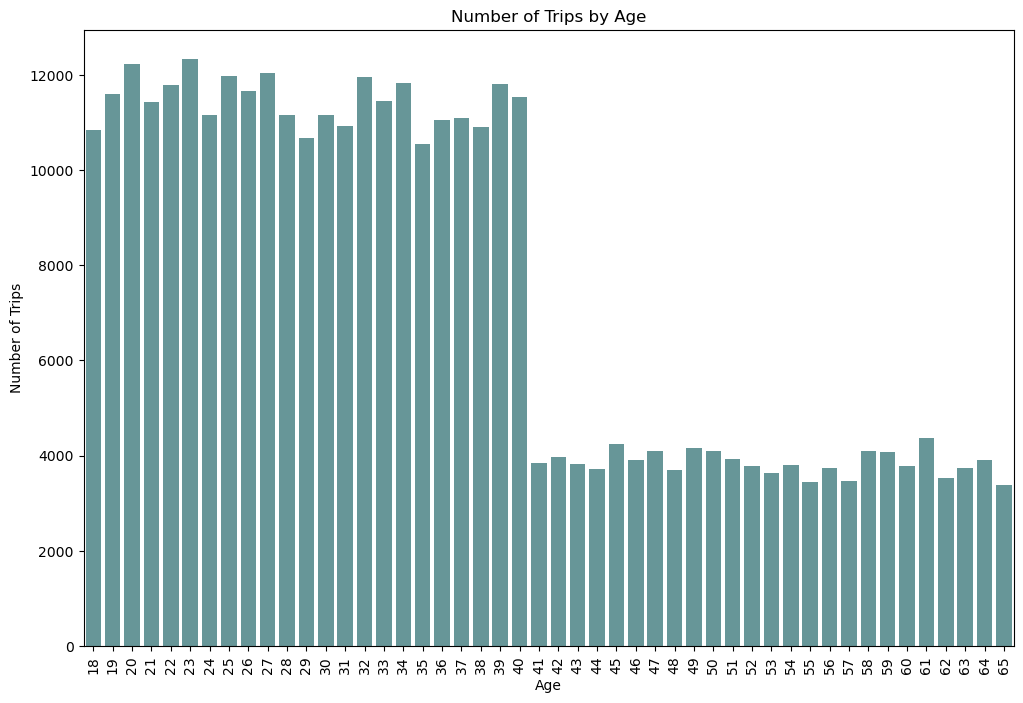

In [156]:
plt.figure(figsize=(12,8))
Age_trip_counts= table_union['Age'].value_counts()
sns.barplot(x=Age_trip_counts.index, y=Age_trip_counts.values, color= 'cadetblue')
plt.title('Number of Trips by Age')
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()

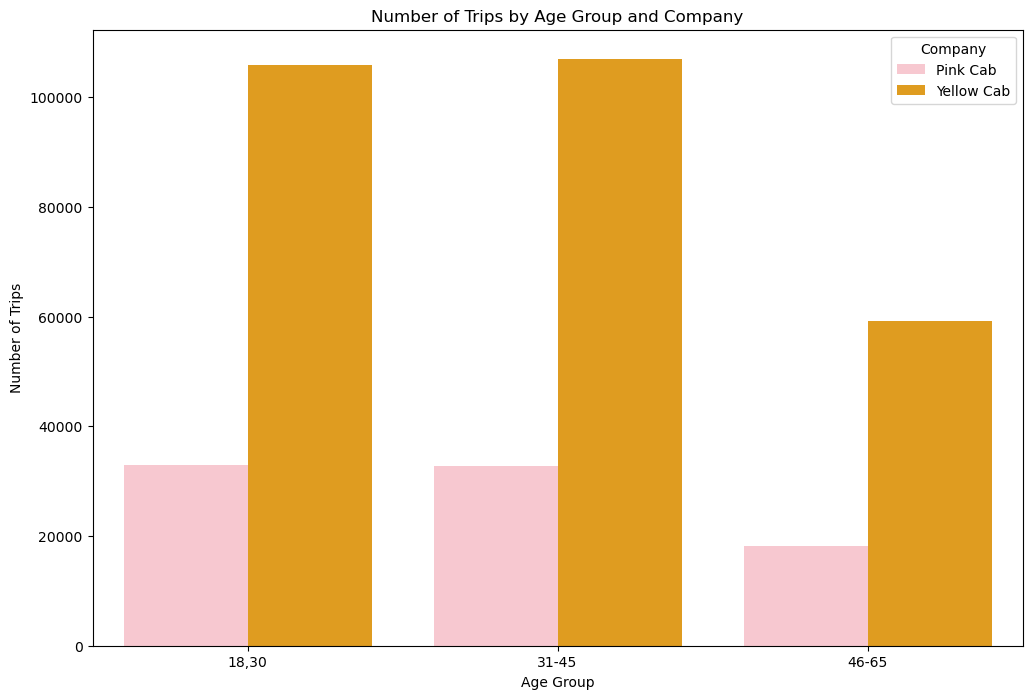

In [158]:
# An age analysis is carried out to observer which population uses this service the most
age = [18, 30, 45, 65] 
labels = ['18,30', '31-45', '46-65']
table_union['Age Group'] = pd.cut(table_union['Age'], bins=age, labels=labels, right=False)
age_company_counts = table_union.groupby(['Age Group', 'Company'], observed=True).size().reset_index(name='Number of Trips')
plt.figure(figsize=(12, 8))
sns.barplot(x='Age Group', y='Number of Trips', hue='Company', data=age_company_counts, palette={'Pink Cab':'Pink', 'Yellow Cab': 'orange'})
plt.title('Number of Trips by Age Group and Company')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.show()

In [159]:
## We carry out an in-depth analysis of the relationship between km and profit margin, 
#to determine which company obtains the highest profit margin per km.

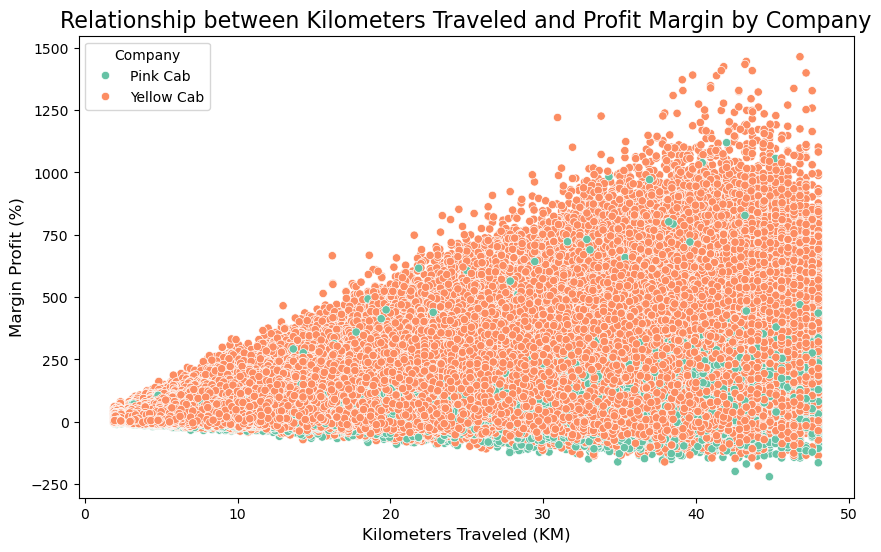

In [161]:
table_union['margin']= table_union['Price Charged']-table_union['Cost of Trip']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=table_union['KM Travelled'], y=table_union['margin'], hue='Company', data=table_union, palette= 'Set2')

# Añadir títulos y etiquetas
plt.title('Relationship between Kilometers Traveled and Profit Margin by Company', fontsize=16)
plt.xlabel('Kilometers Traveled (KM)', fontsize=12)
plt.ylabel('Margin Profit (%)', fontsize=12)
plt.show()




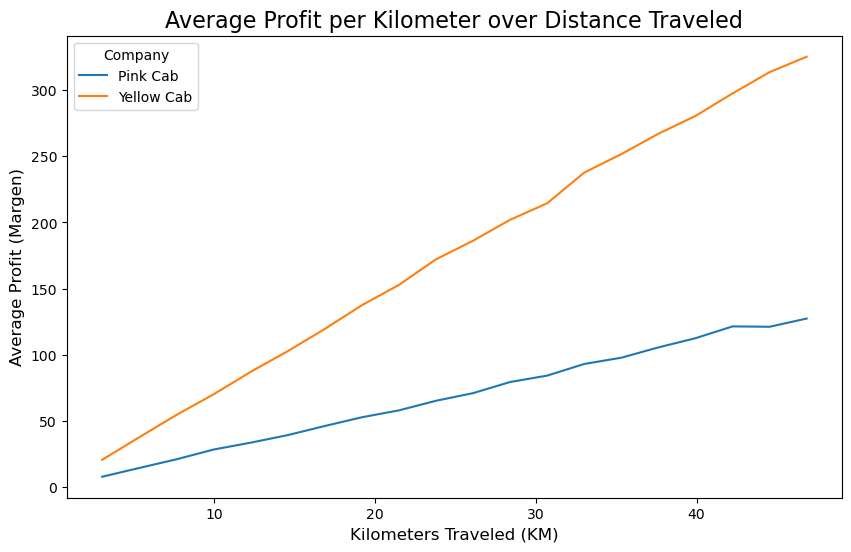

In [162]:
km_bins = pd.cut(table_union['KM Travelled'], bins=20)
table_avg = table_union.groupby([km_bins, 'Company'], observed=False).agg({'margin': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=table_avg['KM Travelled'].apply(lambda x: x.mid), y=table_avg['margin'], hue='Company', data=table_avg)

plt.title('Average Profit per Kilometer over Distance Traveled', fontsize=16)
plt.xlabel('Kilometers Traveled (KM)', fontsize=12)
plt.ylabel('Average Profit (Margen)', fontsize=12)
plt.show()


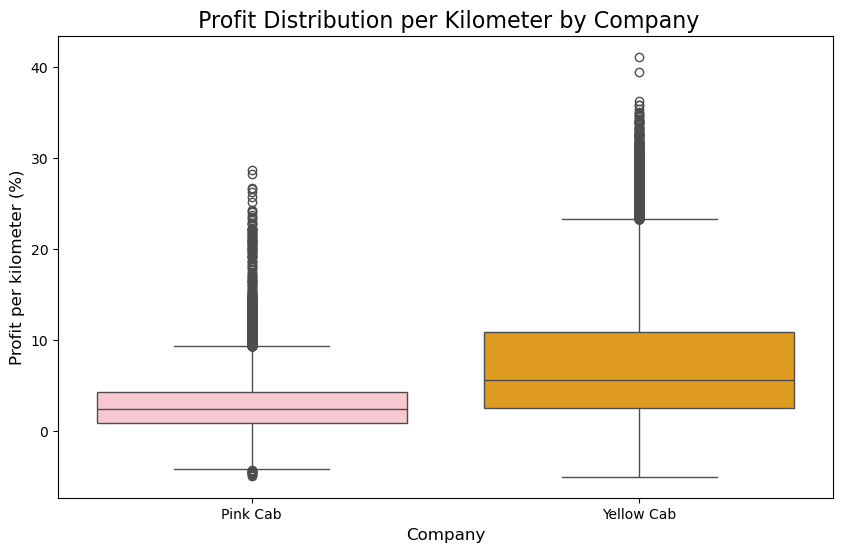

In [163]:
table_union['ganancia_por_km'] = table_union['margin'] / table_union['KM Travelled']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='ganancia_por_km', data=table_union, hue= 'Company', palette={'Pink Cab': 'pink', 'Yellow Cab': 'orange'})
plt.title(' Profit Distribution per Kilometer by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Profit per kilometer (%)', fontsize=12)
plt.show()


In [164]:
## We conducted a gender analysis to determine which gender uses this service the most.

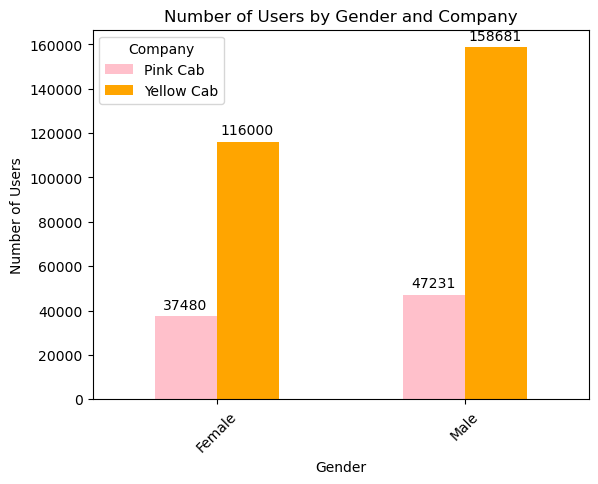

In [165]:
gender_company = table_union.groupby(['Gender', 'Company']).size().unstack()
Ix = gender_company.plot(kind='bar', stacked=False, title='Number of Users by Gender and Company', color=['pink', 'orange'])

for container in Ix.containers:
    Ix.bar_label(container, label_type='edge', padding=3)

plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

In [167]:
## We conducted a payment method analysis to determine which is the most used in each company.

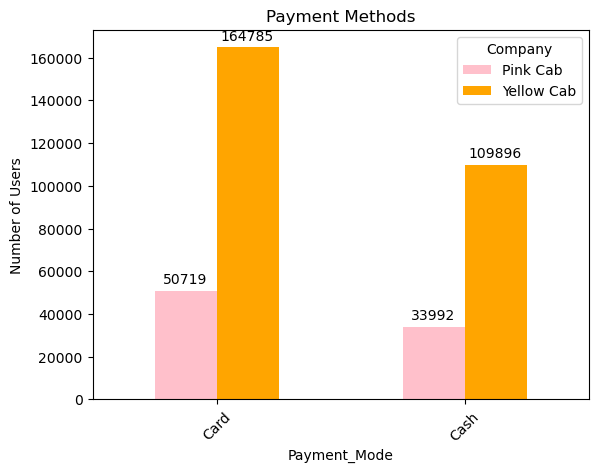

In [168]:
gender_company = table_union.groupby(['Payment_Mode', 'Company']).size().unstack()
Ix = gender_company.plot(kind='bar', stacked=False, title='Payment Methods', color=['pink', 'orange'])

for container in Ix.containers:
    Ix.bar_label(container, label_type='edge', padding=3)

plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

In [169]:
## Analysis
#This case is analyzed with its respective Python codes, where the Pandas, Numpy libraries are imported, and to visualize the information in plots,
#Seaborn and Matplotlib are imported. Data cleaning was performed, such as removing duplicates, handling null spaces, among others, and addressing the outliers.
#After this analysis, the necessary information can be obtained, showing that the company Pink Cab had more than 50% fewer customers than Yellow Cab,
#meaning that Yellow Cab dominates the entire U.S. territory. In the graphs, certain detailed information is compared to visualize and understand the questions posed.


In [170]:
## Conclusion
#It can be concluded that Yellow Cab has a higher number of customers in different cities across the United States.
#It is also observed that most trips are made within the price range of $100 to $500, and the customers are between the ages of 18 to 40 years.
#The city with the highest number of trips is New York, and there is seasonality in December due to the Christmas and New Year holidays. 
#The correlation is positive, indicating that the more customers there are, the more trips the company will have, and consequently, it will generate more profits.
# Customers between the ages of 18 and 40 are the ones who take the most trips, so the focus should be more on this population.
# For the Yellow Cab company, profit margins increase for long-distance trips, whereas for Pink Cab, they remain almost the same. Additionally, Pink Cab shows a loss in profit on certain trips, making it not a profitable option for investment.
# Regarding both companies, it's noticeable that the majority of trips are taken by men, indicating that men have more movement in cities through this mode of transportation.
# In both companies, it is also evident that most customers use credit cards for payment, although the cash payment method should not be overlooked either.


In [91]:
## Recommendation
# Upon conducting the analysis, it is observed that Yellow Cab has a significant competitive advantage over Pink Cab, as Yellow Cab has almost 80% of the users.
#Therefore, according to the positive correlation obtained, it can be identified that a higher number of users leads to greater profits. 
#Thus, the most favorable option would be Yellow Cab. With this result, investing in this company can yield a faster financial return.
# Based on the data obtained, priority should be given to the card payment method and the focus should be more on the population between the ages of 18 and 40.